# Introducción a Numpy: Parte 1  <a class="tocSkip">

## Algunos ejemplos

Dos paquetes que van a resultar muy importantes para nosotros son los paquetes **numpy** y **matplotlib**. Como con todos los módulos, se cargan utilizando la palabra `import`, tal como hicimos en los ejemplos anteriores. Existen variantes en la manera de importar los módulos que son "equivalentes". En este caso le vamos a dar un alias que sea más corto de tipear. Después podemos utilizar sus funciones y definiciones.


### Graficación de datos de archivos

In [1]:
import numpy as np
import matplotlib.pyplot as plt

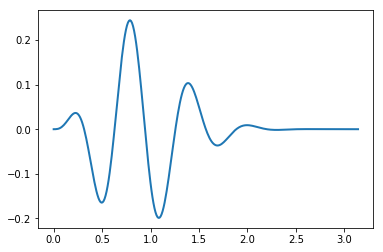

In [2]:
x, y = np.loadtxt('../data/ejemplo_plot_07_1.dat', unpack=True)
plt.plot(x, y)

In [ ]:
# plt.show()

Como vemos es muy simple cargar datos de un archivo y graficarlos. Veamos qué datos hay en el archivo:

In [3]:
!head ../data/ejemplo_plot_07_1.dat

#    x         f(x)
0.000000e+00 0.000000e+00
1.050700e-02 1.157617e-05
2.101400e-02 9.205287e-05
3.152100e-02 3.075650e-04
4.202800e-02 7.187932e-04
5.253499e-02 1.378428e-03
6.304199e-02 2.328857e-03
7.354899e-02 3.600145e-03
8.405599e-02 5.208356e-03


Hay dos columnas, en la primera fila hay texto, y en las siguientes hay valores separados por un espacio. En la primera línea, la función `np.loadtxt()` carga estos valores a las variables `x` e `y`, y en la segunda los graficamos. Inspeccionemos las variables

In [4]:
len(x)

300

In [5]:
x[:10]

array([0.        , 0.010507  , 0.021014  , 0.031521  , 0.042028  ,
       0.05253499, 0.06304199, 0.07354899, 0.08405599, 0.09456299])

In [6]:
type(x), type(y)

(numpy.ndarray, numpy.ndarray)

Como vemos, el tipo **no es una lista** sino un nuevo tipo: **ndarray**, o simplemente **array**. Veamos cómo trabajar con ellos.

### Comparación de listas y *arrays*

Comparemos como operamos sobre un conjunto de números cuando los representamos por una lista, o por un array:

In [7]:
dlist = [1.5, 3.8, 4.9, 12.3, 27.2, 35.8, 70.2, 90., 125., 180.]

In [8]:
d = np.array(dlist)

In [9]:
d is dlist

False

In [10]:
print(dlist)

[1.5, 3.8, 4.9, 12.3, 27.2, 35.8, 70.2, 90.0, 125.0, 180.0]


In [11]:
print(d)

[  1.5   3.8   4.9  12.3  27.2  35.8  70.2  90.  125.  180. ]


Veamos cómo se hace para operar con estos dos tipos. Si los valores representan ángulos en grados, hagamos la conversión a radianes (radián = $\pi/180$ grado)

In [12]:
from math import pi
drlist= [a*pi/180 for a in dlist]

In [13]:
print(drlist)

[0.02617993877991494, 0.06632251157578452, 0.08552113334772216, 0.21467549799530256, 0.47472955654245763, 0.62482787221397, 1.2252211349000193, 1.5707963267948966, 2.1816615649929116, 3.141592653589793]


In [14]:
dr= d*(np.pi/180)

In [15]:
print(dr)

[0.02617994 0.06632251 0.08552113 0.2146755  0.47472956 0.62482787
 1.22522113 1.57079633 2.18166156 3.14159265]


Vemos que el modo de trabajar es más simple ya que los array permiten trabajar con operaciones elemento-a-elemento mientras que para las listas tenemos que usar comprensiones de listas. Veamos otros ejemplos:

In [16]:
print([np.sin(a*pi/180) for a in dlist])

[0.02617694830787315, 0.06627390040000014, 0.08541692313736747, 0.21303038627497659, 0.4570979270586942, 0.5849576749872154, 0.9408807689542255, 1.0, 0.819152044288992, 1.2246467991473532e-16]


In [17]:
print(np.sin(np.deg2rad(d)))

[2.61769483e-02 6.62739004e-02 8.54169231e-02 2.13030386e-01
 4.57097927e-01 5.84957675e-01 9.40880769e-01 1.00000000e+00
 8.19152044e-01 1.22464680e-16]


Además de la simplicidad para trabajar con operaciones que actúan sobre cada elemento, el paquete tiene una gran cantidad de funciones y constantes definidas (como poer ejemplo `np.pi` para $\pi$).

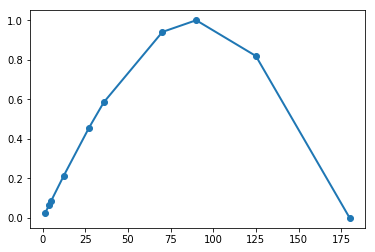

In [19]:
plt.plot(d, np.sin(np.deg2rad(d)),'o-')
#plt.show()

### Generación de datos equiespaciados

Para obtener datos equiespaciados hay dos funciones complementarias

In [20]:
a1 = np.arange(0,190,10)
a2 = np.linspace(0,180,19)

In [21]:
a1

array([  0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120,
       130, 140, 150, 160, 170, 180])

In [22]:
a2

array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.,
       110., 120., 130., 140., 150., 160., 170., 180.])

Como vemos, ambos pueden dar resultados similares, y es una cuestión de conveniencia cual utilizar. El uso es:

```python
np.arange([start,] stop[, step,], dtype=None)

np.linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None)
```

Mientras que a `arange()` le decimos cuál es el paso a utilizar, a `linspace()` debemos (podemos) darle como tercer argumento el número de valores que queremos.

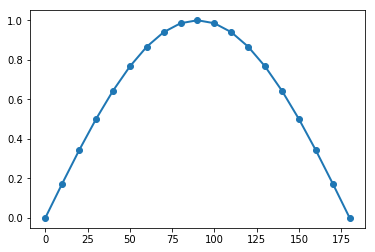

In [23]:
plt.plot(a2, np.sin(np.deg2rad(a2)),'o-')
plt.show()

In [24]:
# Pedimos que devuelva el paso también
v1, step1 = np.linspace(0,10,20, endpoint=True, retstep=True)
v2, step2 = np.linspace(0,10,20, endpoint=False, retstep=True)

In [25]:
print(step1)
print(step2)

0.5263157894736842
0.5


Además de valores linealmente espaciados podemos obtener valores espaciados en escala logarítmica

In [26]:
w= np.logspace(0,10,20)

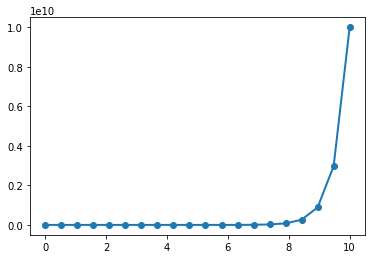

In [27]:
plt.plot(v1, w, 'o-')
#plt.show()

## Características de *arrays* en **Numpy**

Numpy define unas nuevas estructuras llamadas *ndarrays* o *arrays* para trabajar con vectores de datos, en una dimensión o más dimensiones ("matrices").
Los arrays son variantes de las listas de python preparadas para trabajar a mayor velocidad y menor consumo de memoria. Por ello se requiere que los arrays sean menos generales y versátiles que las listas usuales. Analicemos brevemente las diferencias entre estos tipos y las consecuencias que tendrá en su uso para nosotros.

### Uso de memoria de listas y arrays

Las listas son sucesiones de elementos, completamente generales y no necesariamente todos iguales. Un esquema de su representación interna se muestra en el siguiente gráfico para una lista de números enteros (Las figuras y el análisis de esta sección son de www.python-course.eu/numpy.php)

![Representación en memoria de una lista](figuras/list_structure.png)

Básicamente en una lista se guarda información común a cualquier lista, un lugar de almacenamiento que referencia donde buscar cada uno de sus elementos (que puede ser un objeto diferente) y luego el lugar efectivo para guardar cada elemento. Veamos cuanta memoria se necesita para guardar una lista de enteros:

In [28]:
from sys import getsizeof
lst = [24, 12, 57]
size_of_list_object = getsizeof(lst)   # only green box
#size_of_elements = getsizeof(lst[0]) + getsizeof(lst[1]) + getsizeof(lst[2])
size_of_elements = sum(getsizeof(l) for l in lst)
total_list_size = size_of_list_object + size_of_elements
print("Tamaño sin considerar los elementos: ", size_of_list_object)
print("Tamaño de los elementos: ", size_of_elements)
print("Tamaño total: ", total_list_size)

Tamaño sin considerar los elementos:  88
Tamaño de los elementos:  84
Tamaño total:  172


Para calcular cuánta memoria se usa en cada parte de una lista analicemos el tamaño de distintos casos:

In [29]:
print('Una lista vacía ocupa: {} bytes'.format(getsizeof([])))
print('Una lista con un elem: {} bytes'.format(getsizeof([24])))
print('Una lista con 2 elems: {} bytes'.format(getsizeof([24,12])))
print('Un entero en Python  : {} bytes'.format(getsizeof(24)))

Una lista vacía ocupa: 64 bytes
Una lista con un elem: 72 bytes
Una lista con 2 elems: 80 bytes
Un entero en Python  : 28 bytes


Vemos que la "Información general de listas" ocupa **64 bytes**, y la referencia a cada elemento entero ocupa adicionalmente **8 bytes**. 
Además, cada elemento, un entero de Python, en este caso ocupa **28 bytes**, por lo que el tamaño total de una **lista** de $n$ números enteros será:

$$  M_{L}(n) = 64 + n \times 8 + n \times 28 $$

En contraste, los *arrays* deben ser todos del mismo tipo por lo que su representación es más simple (por ejemplo, no es necesario guardar sus valores separadamente)

![Representación en memoria de una lista](figuras/array_structure.png)

In [30]:
a = np.array(lst)
print(getsizeof(a))

120


Para analizar como se distribuye el consumo de memoria en un array vamos a calcular el tamaño de cada uno de los elementos como hicimos con las listas:

In [31]:
print('Un array vacío ocupa: {} bytes'.format(getsizeof(np.array([]))))
print('Un array con un elem: {} bytes'.format(getsizeof(np.array([24]))))
print('Un array con 2 elems: {} bytes'.format(getsizeof(np.array([24,12]))))
print('Un entero de Numpy es: {}'.format(type(a[0])))

Un array vacío ocupa: 96 bytes
Un array con un elem: 104 bytes
Un array con 2 elems: 112 bytes
Un entero de Numpy es: <class 'numpy.int64'>


Vemos que la información general sobre arrays ocupa **96 bytes** (en contraste a **64** para listas), y por cada elemento otros **8 bytes** adicionales (`numpy.int64` corresponde a 64 bits), por lo que el tamaño total será:

$$  M_{a}(n) = 96 + n \times 8 $$

In [32]:
from sys import getsizeof
lst1 = list(range(1000))
total_list_size = getsizeof(lst1) + sum(getsizeof(l) for l in lst1)
print("Tamaño total de la lista: ", total_list_size)
a1 = np.array(lst1)
print("Tamaño total de array: ", getsizeof(a1))

Tamaño total de la lista:  37108
Tamaño total de array:  8096


### Velocidad de **Numpy**
Una de las grandes ventajas de usar *Numpy* está relacionada con la velocidad de cálculo. Veamos (superficialmente) esto

In [ ]:
%load scripts/timing.py

In [33]:
# %load scripts/timing.py
# Ejemplo del libro en www.python-course.eu/numpy.php

import numpy as np
from timeit import Timer
Ndim = 10000


def pure_python_version():
  X = range(Ndim)
  Y = range(Ndim)
  Z = []
  for i in range(len(X)):
    Z.append(X[i] + Y[i])
  return Z


def numpy_version():
  X = np.arange(Ndim)
  Y = np.arange(Ndim)
  Z = X + Y
  return Z

timer_obj1 = Timer("pure_python_version()", "from __main__ import pure_python_version")
timer_obj2 = Timer("numpy_version()", "from __main__ import numpy_version")
t1 = timer_obj1.timeit(10)
t2 = timer_obj2.timeit(10)

print("Numpy es en este ejemplo {:.3f} más rápido".format(t1 / t2))


Numpy es en este ejemplo 167.169 más rápido


In [34]:
# %load scripts/timing.py
# Ejemplo del libro en www.python-course.eu/numpy.php

import numpy as np
from timeit import Timer
Ndim = 10000


def pure_python_version():
  X = range(Ndim)
  Y = range(Ndim)
  Z = []
  for i in range(len(X)):
    Z.append(X[i] + Y[i])
  return Z


def numpy_version():
  X = np.arange(Ndim)
  Y = np.arange(Ndim)
  Z = X + Y
  return Z

timer_obj1 = Timer("pure_python_version()", "from __main__ import pure_python_version")
timer_obj2 = Timer("numpy_version()", "from __main__ import numpy_version")
t1 = timer_obj1.timeit(10)
t2 = timer_obj2.timeit(10)

print("Numpy es en este ejemplo {:.3f} más rápido".format(t1 / t2))


Numpy es en este ejemplo 278.545 más rápido


Como vemos, utilizar *Numpy* puede ser considerablemente más rápido que usar *Python puro*.

## Creación de *arrays* en **Numpy**

Un `array` en numpy es un tipo de variable parecido a una lista, pero está optimizado para realizar trabajo numérico.

Todos los elementos deben ser del mismo tipo, y además de los valores, contiene información sobre su tipo. Veamos algunos ejemplos de cómo crearlos y utilizarlos:

### Creación de *Arrays* unidimensionales

In [35]:
i1 = np.array([1, 2, 3, 1, 5, 1, 9, 22, 0])
r1 = np.array([1.4 ,2.3 ,3.0 ,1, 5, 1, 9, 22, 0])

In [36]:
print(i1)
print(r1)

[ 1  2  3  1  5  1  9 22  0]
[ 1.4  2.3  3.   1.   5.   1.   9.  22.   0. ]


In [37]:
print('tipo de i1: {} \ntipo de r1: {}'.format(i1.dtype, r1.dtype))

tipo de i1: int64 
tipo de r1: float64


In [38]:
print('Para i1:\n  Número de dimensiones: {}\n  Longitud: {}'.format(np.ndim(i1), len(i1)))

Para i1:
  Número de dimensiones: 1
  Longitud: 9


In [39]:
print('Para r1:\n  Número de dimensiones: {}\n  Longitud: {}'.format(np.ndim(r1), len(r1)))

Para r1:
  Número de dimensiones: 1
  Longitud: 9


### Arrays multidimensionales

Podemos crear explícitamente *arrays* multidimensionales con la función `np.array` si el argumento es una lista anidada

In [40]:
L = [ [1, 2, 3], [.2, -.2, -1], [-1, 2, 9], [0, 0.5, 0] ]

A = np.array(L)

In [41]:
A

array([[ 1. ,  2. ,  3. ],
       [ 0.2, -0.2, -1. ],
       [-1. ,  2. ,  9. ],
       [ 0. ,  0.5,  0. ]])

In [42]:
print(A)

[[ 1.   2.   3. ]
 [ 0.2 -0.2 -1. ]
 [-1.   2.   9. ]
 [ 0.   0.5  0. ]]


In [43]:
print(A.ndim)

2


In [44]:
print(len(A))

4


Vemos que la dimensión de `A` es 2, pero la longitud que me reporta **Python** corresponde al primer eje. Los *arrays* tienen un atributo que es la "forma" (shape)

In [ ]:
print(A.shape)

### Otras formas de creación

Hay otras maneras de crear **numpy arrays**. Algunas, de las más comunes es cuando necesitamos crear un array con todos ceros o unos o algún valor dado

In [45]:
a= np.zeros(5)

In [51]:
a.dtype                         # El tipo default es float de 64 bits

dtype('float64')

In [52]:
a

array([0., 0., 0., 0., 0.])

In [47]:
i= np.zeros(5, dtype=int)

In [48]:
print(i)

[0 0 0 0 0]


In [53]:
i.dtype

dtype('int64')

In [54]:
c= np.zeros(5,dtype=complex)
print(c)
print(c.dtype)

[0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
complex128


En lugar de inicializarlo en cero podemos inicializarlo con algún valor

In [55]:
np.ones(5, dtype=complex) + 1j      # Algo similar pero inicializando a unos

array([1.+1.j, 1.+1.j, 1.+1.j, 1.+1.j, 1.+1.j])

Ya vimos que también podemos inicializarlos con valores "equiespaciados" con `np.arange()`, con `np.linspace()` o con `np.logspace()`

In [57]:
v = np.arange(2,15,2) # Crea un array con una secuencia (similar a la función range)
v

array([ 2,  4,  6,  8, 10, 12, 14])

Para crear *arrays* multidimensionales usamos:


In [58]:
np.ones((4,5))

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

In [59]:
np.ones((4,3,6))

array([[[1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1.]],

       [[1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1.]],

       [[1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1.]],

       [[1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1.]]])

In [60]:
np.eye(4)

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

In [61]:
np.eye(3,7)

array([[1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.]])

En este último ejemplo hemos creado matrices con unos en la diagonal y ceros en todos los demás lugares.

## Acceso a los elementos

El acceso a los elementos tiene una forma muy parecida a la de las listas (pero no exactamente igual). 

In [62]:
print(r1)

[ 1.4  2.3  3.   1.   5.   1.   9.  22.   0. ]


Si queremos uno de los elementos usamos la notación:

In [63]:
print(r1[0], r1[3], r1[-1])

1.4 1.0 0.0


y para "tajadas" (*slices*)

In [64]:
print(r1[:3])

[1.4 2.3 3. ]


In [65]:
print(r1[-3:])

[ 9. 22.  0.]


In [66]:
print(r1[5:7])

[1. 9.]


In [67]:
print(r1[0:8:2])

[1.4 3.  5.  9. ]


Como con vectores unidimensionales, con arrays multidimensionales, se puede ubicar un elemento o usar *slices*:

In [78]:
arr = np.arange(55).reshape((5,-1))

In [76]:
arr

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10],
       [11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21],
       [22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32],
       [33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43],
       [44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54]])

In [79]:
print( 'Slicing parte de la segunda fila :', arr[1, 2:4])
print('Todas las filas, tercera columna :', arr[:, 2])

Slicing parte de la segunda fila : [13 14]
Todas las filas, tercera columna : [ 2 13 24 35 46]


In [80]:
print( 'Primera fila   :\n', arr[0], '\nes igual a :\n', arr[0,:])

Primera fila   :
 [ 0  1  2  3  4  5  6  7  8  9 10] 
es igual a :
 [ 0  1  2  3  4  5  6  7  8  9 10]


In [81]:
print( 'Segunda fila   :\n', arr[1], '\nes igual a :\n', arr[1,:])

Segunda fila   :
 [11 12 13 14 15 16 17 18 19 20 21] 
es igual a :
 [11 12 13 14 15 16 17 18 19 20 21]


In [82]:
print( 'Primera columna:', arr[:,0])

Primera columna: [ 0 11 22 33 44]


In [83]:
print( 'Última columna : \n', arr[:,-1])

Última columna : 
 [10 21 32 43 54]


In [84]:
print( 'Segunda fila, elementos pares (0,2,...) : ', arr[1,::2])

Segunda fila, elementos pares (0,2,...) :  [11 13 15 17 19 21]


In [85]:
print( 'Segunda fila, todos los elementos impares : ', arr[1,1::2])

Segunda fila, todos los elementos impares :  [12 14 16 18 20]


Cuando el *slicing* se hace de la forma `[i:f:s]` significa que tomaremos los elementos entre `i` (inicial), hasta `f` (final, no incluido), pero tomando sólo uno de cada `s` (stride) elementos

![](figuras/numpy_indexing.png) 

En [Scipy Lectures at http://scipy-lectures.github.io](http://scipy-lectures.github.io) hay una descripción del acceso a arrays.

  

## Propiedades de **Numpy** arrays

### Propiedades básicas

Hay tres propiedades básicas que caracterizan a un array:

* `shape`: Contiene información sobre la forma que tiene un array (sus dimensiones: vector, matriz, o tensor)
* `dtype`: Es el tipo de cada uno de sus elementos (todos son iguales)
* `stride`: Contiene la información sobre como recorrer el array. Por ejemplo si es una matriz, tiene la información de cuántos bytes en memoria hay que pasar para pasar de una fila a la siguiente y de una columna a la siguiente.

In [95]:
arr = np.arange(1,56).reshape((5,11))

In [96]:
print( 'shape  :', arr.shape)
print( 'dtype  :', arr.dtype)
print( 'strides:', arr.strides)

shape  : (5, 11)
dtype  : int64
strides: (88, 8)


In [97]:
print(np.arange(55))
print(np.arange(55).shape)
print(arr.shape)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54]
(55,)
(5, 11)


### Otras propiedades y métodos de los *array*

Los array tienen atributos que nos dan información sobre sus características:

In [98]:
print( 'Número total de elementos :', arr.size)
print( 'Número de dimensiones     :', arr.ndim)
print( 'Memoria usada             : {} bytes'.format( arr.nbytes))

Número total de elementos : 55
Número de dimensiones     : 2
Memoria usada             : 440 bytes


In [99]:
getsizeof(arr)

112

Además, tienen métodos que facilitan algunos cálculos comunes. Veamos algunos de ellos:

In [100]:
print( 'Mínimo y máximo                  :', arr.min(), arr.max())
print( 'Suma y producto de sus elementos :', arr.sum(), arr.prod())
print( 'Media y desviación standard      :', arr.mean(), arr.std())

Mínimo y máximo                  : 1 55
Suma y producto de sus elementos : 1540 6711489344688881664
Media y desviación standard      : 28.0 15.874507866387544


Para todos estos métodos, las operaciones se realizan sobre todos los elementos. En array multidimensionales uno puede elegir realizar los cálculos sólo sobre un dado eje:

In [101]:
print( 'Para el array:\n', arr)

Para el array:
 [[ 1  2  3  4  5  6  7  8  9 10 11]
 [12 13 14 15 16 17 18 19 20 21 22]
 [23 24 25 26 27 28 29 30 31 32 33]
 [34 35 36 37 38 39 40 41 42 43 44]
 [45 46 47 48 49 50 51 52 53 54 55]]


In [102]:
print( 'La suma de todos los elementos es    :', arr.sum())

La suma de todos los elementos es    : 1540


In [103]:
print( 'La suma de elementos de las filas es :', arr.sum(axis=1))

La suma de elementos de las filas es : [ 66 187 308 429 550]


In [104]:
print( 'La suma de elementos de las columnas es :', arr.sum(axis=0))

La suma de elementos de las columnas es : [115 120 125 130 135 140 145 150 155 160 165]


## Operaciones sobre arrays

### Operaciones básicas

Los array se pueden usar en operaciones:

In [105]:
# Suma de una constante
arr1 = 1 + arr[:,::-1]              # Creamos un segundo array

In [106]:
arr1

array([[12, 11, 10,  9,  8,  7,  6,  5,  4,  3,  2],
       [23, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13],
       [34, 33, 32, 31, 30, 29, 28, 27, 26, 25, 24],
       [45, 44, 43, 42, 41, 40, 39, 38, 37, 36, 35],
       [56, 55, 54, 53, 52, 51, 50, 49, 48, 47, 46]])

In [107]:
# Multiplicación por constantes y suma de arrays
2*arr + 3*arr1

array([[ 38,  37,  36,  35,  34,  33,  32,  31,  30,  29,  28],
       [ 93,  92,  91,  90,  89,  88,  87,  86,  85,  84,  83],
       [148, 147, 146, 145, 144, 143, 142, 141, 140, 139, 138],
       [203, 202, 201, 200, 199, 198, 197, 196, 195, 194, 193],
       [258, 257, 256, 255, 254, 253, 252, 251, 250, 249, 248]])

In [108]:
# División por constantes
arr/5

array([[ 0.2,  0.4,  0.6,  0.8,  1. ,  1.2,  1.4,  1.6,  1.8,  2. ,  2.2],
       [ 2.4,  2.6,  2.8,  3. ,  3.2,  3.4,  3.6,  3.8,  4. ,  4.2,  4.4],
       [ 4.6,  4.8,  5. ,  5.2,  5.4,  5.6,  5.8,  6. ,  6.2,  6.4,  6.6],
       [ 6.8,  7. ,  7.2,  7.4,  7.6,  7.8,  8. ,  8.2,  8.4,  8.6,  8.8],
       [ 9. ,  9.2,  9.4,  9.6,  9.8, 10. , 10.2, 10.4, 10.6, 10.8, 11. ]])

In [109]:
# Multiplicación entre arrays
arr * arr1

array([[  12,   22,   30,   36,   40,   42,   42,   40,   36,   30,   22],
       [ 276,  286,  294,  300,  304,  306,  306,  304,  300,  294,  286],
       [ 782,  792,  800,  806,  810,  812,  812,  810,  806,  800,  792],
       [1530, 1540, 1548, 1554, 1558, 1560, 1560, 1558, 1554, 1548, 1540],
       [2520, 2530, 2538, 2544, 2548, 2550, 2550, 2548, 2544, 2538, 2530]])

In [110]:
arr / arr1

array([[0.08333333, 0.18181818, 0.3       , 0.44444444, 0.625     ,
        0.85714286, 1.16666667, 1.6       , 2.25      , 3.33333333,
        5.5       ],
       [0.52173913, 0.59090909, 0.66666667, 0.75      , 0.84210526,
        0.94444444, 1.05882353, 1.1875    , 1.33333333, 1.5       ,
        1.69230769],
       [0.67647059, 0.72727273, 0.78125   , 0.83870968, 0.9       ,
        0.96551724, 1.03571429, 1.11111111, 1.19230769, 1.28      ,
        1.375     ],
       [0.75555556, 0.79545455, 0.8372093 , 0.88095238, 0.92682927,
        0.975     , 1.02564103, 1.07894737, 1.13513514, 1.19444444,
        1.25714286],
       [0.80357143, 0.83636364, 0.87037037, 0.90566038, 0.94230769,
        0.98039216, 1.02      , 1.06122449, 1.10416667, 1.14893617,
        1.19565217]])

Como vemos, están definidas todas las operaciones por constantes y entre arrays. En operaciones con constantes, se aplican sobre cada elemento del array. En operaciones entre arrays se realizan elemento a elemento (y el número de elementos de los dos array debe ser compatible).

### Comparaciones 

También se pueden comparar dos arrays elemento a elemento

In [111]:
v = np.linspace(0,19,20)
w = np.linspace(0.5,18,20)

In [113]:
print (v)
print (w)

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19.]
[ 0.5         1.42105263  2.34210526  3.26315789  4.18421053  5.10526316
  6.02631579  6.94736842  7.86842105  8.78947368  9.71052632 10.63157895
 11.55263158 12.47368421 13.39473684 14.31578947 15.23684211 16.15789474
 17.07894737 18.        ]


In [114]:
# Comparación de un array con una constante
print(v > 12)

[False False False False False False False False False False False False
 False  True  True  True  True  True  True  True]


In [116]:
# Comparación de un array con otro
print(v > w)

[False False False False False False False  True  True  True  True  True
  True  True  True  True  True  True  True  True]


### Funciones definidas en **Numpy**

Algunas de las funciones definidas en numpy se aplican a cada elemento. Por ejemplo, las funciones matemáticas:

In [117]:
np.sin(arr1)

array([[-0.53657292, -0.99999021, -0.54402111,  0.41211849,  0.98935825,
         0.6569866 , -0.2794155 , -0.95892427, -0.7568025 ,  0.14112001,
         0.90929743],
       [-0.8462204 , -0.00885131,  0.83665564,  0.91294525,  0.14987721,
        -0.75098725, -0.96139749, -0.28790332,  0.65028784,  0.99060736,
         0.42016704],
       [ 0.52908269,  0.99991186,  0.55142668, -0.40403765, -0.98803162,
        -0.66363388,  0.27090579,  0.95637593,  0.76255845, -0.13235175,
        -0.90557836],
       [ 0.85090352,  0.01770193, -0.83177474, -0.91652155, -0.15862267,
         0.74511316,  0.96379539,  0.29636858, -0.64353813, -0.99177885,
        -0.42818267],
       [-0.521551  , -0.99975517, -0.55878905,  0.39592515,  0.98662759,
         0.67022918, -0.26237485, -0.95375265, -0.76825466,  0.12357312,
         0.90178835]])

In [118]:
np.exp(-arr**2/2)

array([[6.06530660e-001, 1.35335283e-001, 1.11089965e-002,
        3.35462628e-004, 3.72665317e-006, 1.52299797e-008,
        2.28973485e-011, 1.26641655e-014, 2.57675711e-018,
        1.92874985e-022, 5.31109225e-027],
       [5.38018616e-032, 2.00500878e-037, 2.74878501e-043,
        1.38634329e-049, 2.57220937e-056, 1.75568810e-063,
        4.40853133e-071, 4.07235863e-079, 1.38389653e-087,
        1.73008221e-096, 7.95674389e-106],
       [1.34619985e-115, 8.37894253e-126, 1.91855567e-136,
        1.61608841e-147, 5.00796571e-159, 5.70904011e-171,
        2.39425476e-183, 3.69388307e-196, 2.09653176e-209,
        4.37749104e-223, 3.36244047e-237],
       [9.50144065e-252, 9.87710872e-267, 3.77724997e-282,
        5.31406836e-298, 2.75032531e-314, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000],
       [0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
  

In [ ]:
v[w > 9]

También podemos hacer todo tipo de operaciones (suma, resta, multiplicación,....) entre *arrays*

### Lectura y escritura de datos a archivos

Numpy tiene funciones que permiten escribir y leer datos de varias maneras, tanto en formato *texto* como en *binario*. En general el modo *texto* ocupa más espacio pero puede ser leído y modificado con un editor.

#### Datos en formato texto

In [119]:
np.savetxt('test.out', arr, fmt='%.2e', header="x    y   \n z    z2", comments="% ")
!cat test.out

% x    y   
%  z    z2
1.00e+00 2.00e+00 3.00e+00 4.00e+00 5.00e+00 6.00e+00 7.00e+00 8.00e+00 9.00e+00 1.00e+01 1.10e+01
1.20e+01 1.30e+01 1.40e+01 1.50e+01 1.60e+01 1.70e+01 1.80e+01 1.90e+01 2.00e+01 2.10e+01 2.20e+01
2.30e+01 2.40e+01 2.50e+01 2.60e+01 2.70e+01 2.80e+01 2.90e+01 3.00e+01 3.10e+01 3.20e+01 3.30e+01
3.40e+01 3.50e+01 3.60e+01 3.70e+01 3.80e+01 3.90e+01 4.00e+01 4.10e+01 4.20e+01 4.30e+01 4.40e+01
4.50e+01 4.60e+01 4.70e+01 4.80e+01 4.90e+01 5.00e+01 5.10e+01 5.20e+01 5.30e+01 5.40e+01 5.50e+01


In [120]:
arr2 = np.loadtxt('test.out', comments="%")
print(arr2)

[[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11.]
 [12. 13. 14. 15. 16. 17. 18. 19. 20. 21. 22.]
 [23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33.]
 [34. 35. 36. 37. 38. 39. 40. 41. 42. 43. 44.]
 [45. 46. 47. 48. 49. 50. 51. 52. 53. 54. 55.]]


In [121]:
print(arr2.shape)
print(arr2.ndim)
print(arr2.size)

(5, 11)
2
55
